# Unsupervised Learning

What you can do when you have no label? It's also a very good visualization techniques.

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [17]:
from sklearn import datasets
from matplotlib import pyplot as plt

In [34]:
digits = datasets.load_digits()
xs = digits.data
ys = digits.target

In [22]:
def show_digit(x):
    plt.matshow(x.reshape(8,8), cmap='gray_r')

<Figure size 432x288 with 0 Axes>

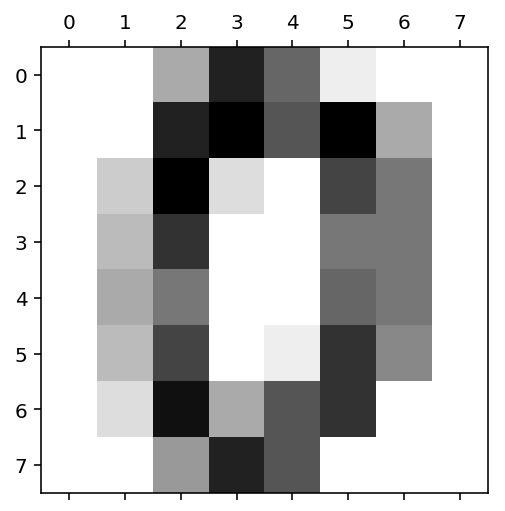

<Figure size 432x288 with 0 Axes>

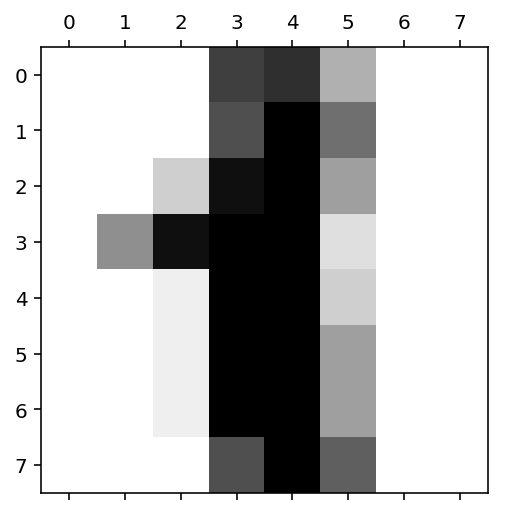

<Figure size 432x288 with 0 Axes>

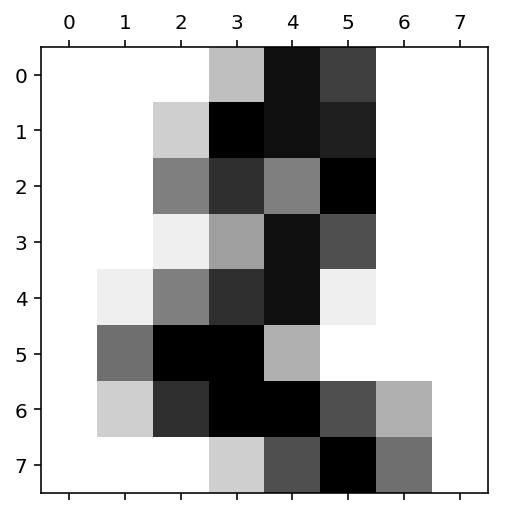

<Figure size 432x288 with 0 Axes>

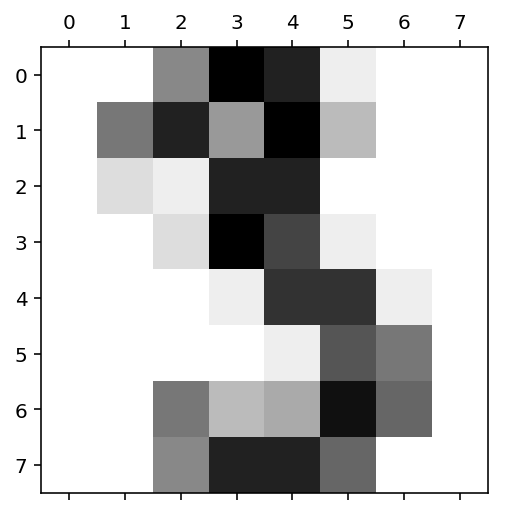

<Figure size 432x288 with 0 Axes>

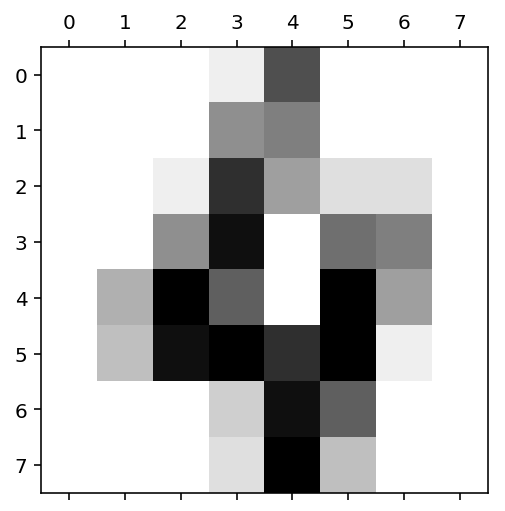

<Figure size 432x288 with 0 Axes>

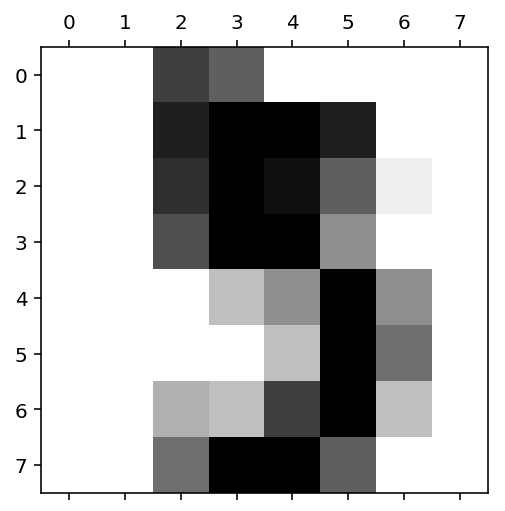

<Figure size 432x288 with 0 Axes>

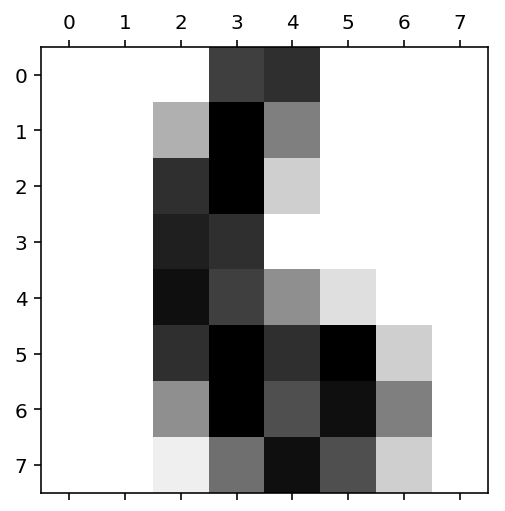

<Figure size 432x288 with 0 Axes>

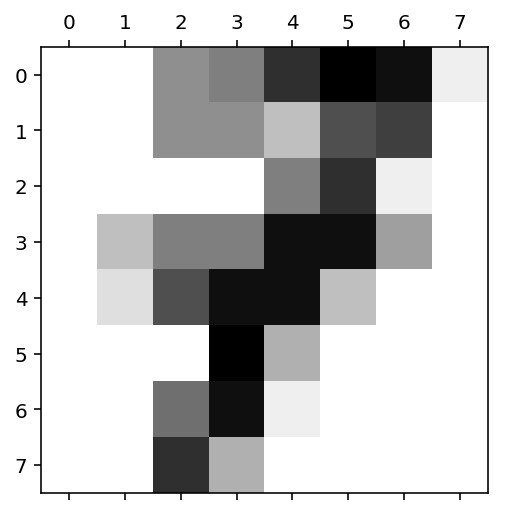

<Figure size 432x288 with 0 Axes>

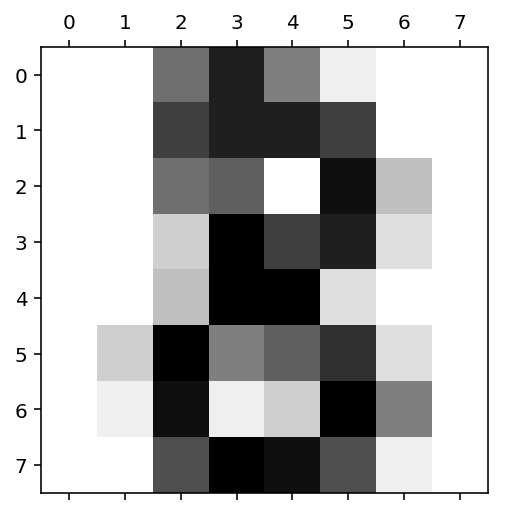

<Figure size 432x288 with 0 Axes>

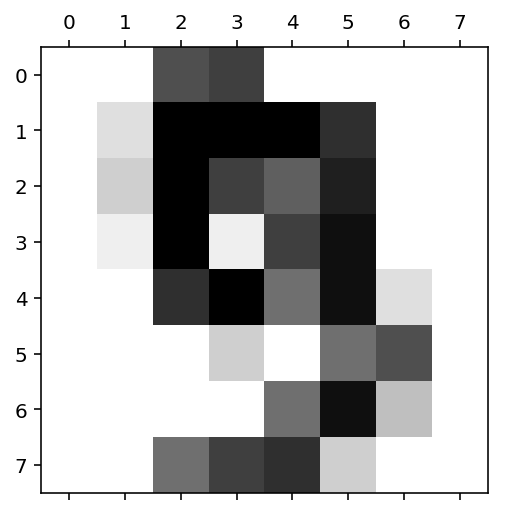

In [31]:
for i in range(10):
    plt.figure()
    show_digit(xs[i])

# First Technique (and most of the time a bad one)

PCA. Principle component analysis. This is based on the idea that good feature has a high variance. So what it tries to find is the linear combination of feature that has the high variance. There is a lot of nice mathematical property about this like the sum of variance is the same before and after transformation.

Then what we can do is plotting it the two most variance feature. But most likely it's a bad one.

[[ -1.25946535  21.27488446  -9.46305569]
 [  7.95760886 -20.76870233   4.43951033]
 [  6.99192252  -9.95598688   2.95855916]
 ...
 [ 10.80128868  -6.96024463   5.59954357]
 [ -4.87211383  12.42393224 -10.17083433]
 [ -0.34438395   6.36555773  10.77369621]]


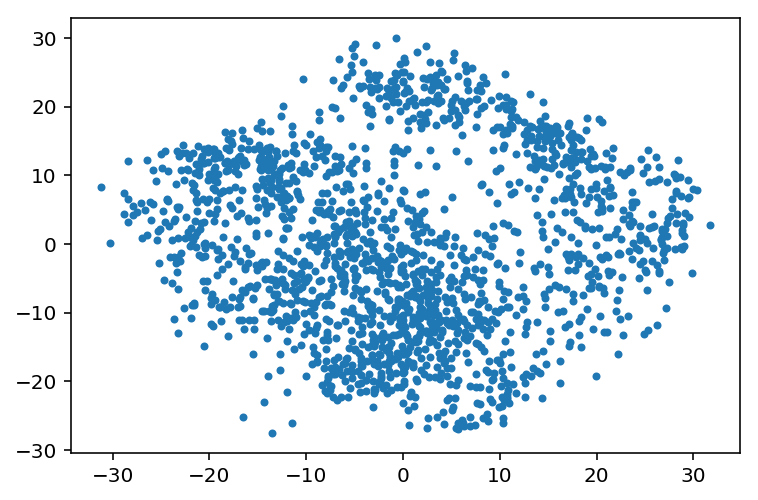

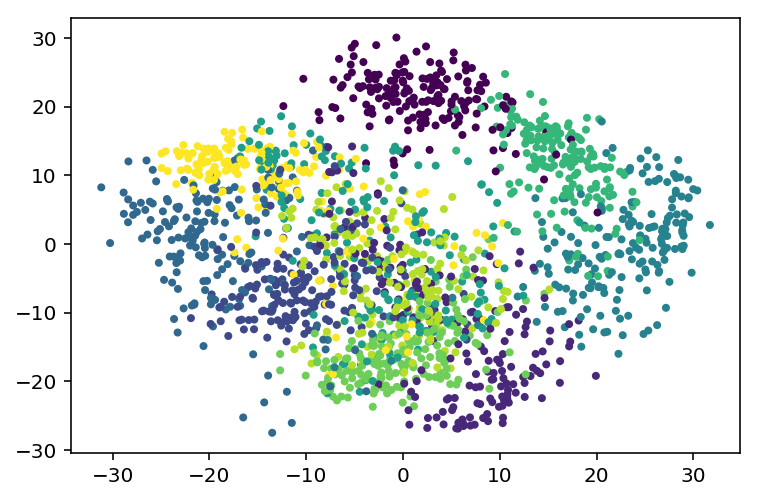

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(xs)

print(pca_result)

plt.scatter(pca_result[:,0], pca_result[:,1], marker='.')
plt.figure()
plt.scatter(pca_result[:,0], pca_result[:,1], c=ys, marker='.')

# Heavy Machinery: Manifold learning.

The idea here is to preserve local structure of the higher dimension while embedding everything in 2D.

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [52]:
tsne_result = tsne.fit_transform(xs)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.004s...
[t-SNE] Computed neighbors for 1797 samples in 0.356s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.394135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.543598
[t-SNE] KL divergence after 300 iterations: 0.959579


In [53]:
tsne_result

array([[-5.3956413 , 14.1805725 ],
       [-5.9068513 , -1.0486721 ],
       [-2.3706028 , -8.73412   ],
       ...,
       [ 0.11600885, -5.301938  ],
       [11.895208  , -0.3155614 ],
       [ 2.5405393 , -6.1792903 ]], dtype=float32)

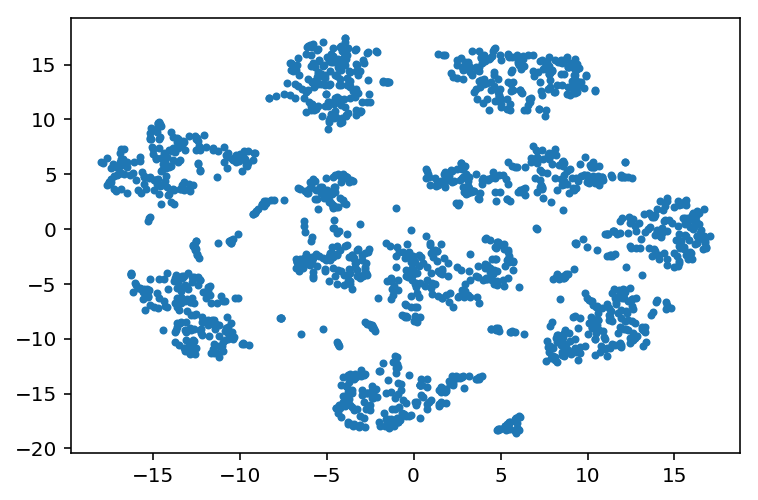

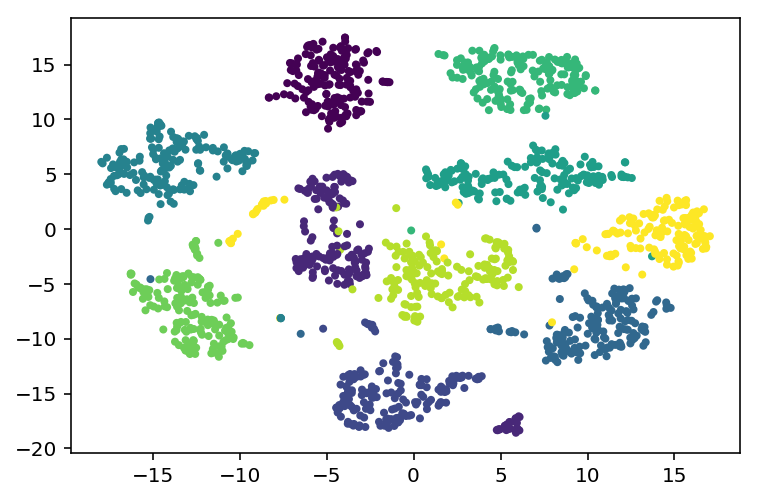

In [54]:
plt.scatter(tsne_result[:,0], tsne_result[:,1], marker='.')
plt.figure()
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=ys, marker='.')

# Cluster

Now we have some hope of clustering.

In [59]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean')

In [60]:
clus_result = clustering.fit_predict(tsne_result)

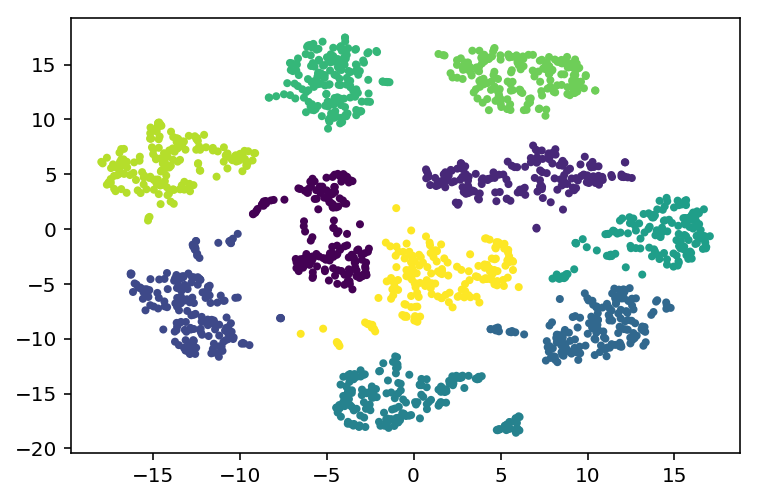

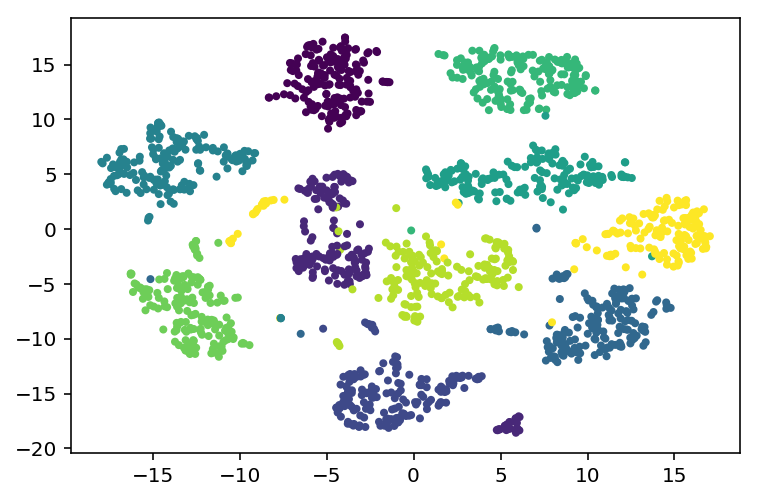

In [61]:
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=clus_result, marker='.')
plt.figure()
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=ys, marker='.')

# Exercise:
Try this on iris dataset

In [64]:
iris = datasets.load_iris()